The following has been done on this dataset:
> - Dimensionality reduction using PCA so that SVM works faster
<br>
> - Grid Search to get the best values of hyperparameters for the SVC classifier
<br>
> - SVC classifier has been used to fit to the data and calculate the accuracy of predictions

In [19]:
from sklearn import datasets, model_selection, metrics, decomposition, svm
import matplotlib.pyplot as plt
import numpy as np

In [20]:
oliv = datasets.fetch_olivetti_faces()
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [21]:
print(oliv.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [22]:
oliv.data.shape

(400, 4096)

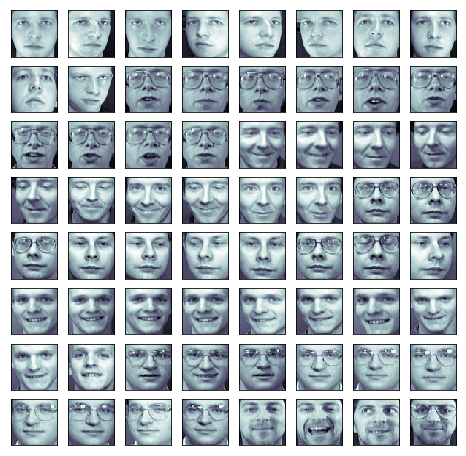

In [23]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [42]:
pca = decomposition.PCA()
pca.fit(oliv.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
k = 0
explained = 0
total = sum(pca.explained_variance_)
while explained/total < 0.95:
    explained += pca.explained_variance_[k]
    k += 1
k    

123

In [44]:
pca2 = decomposition.PCA(n_components=340)
oliv_data_pca = pca2.fit_transform(oliv.data)

In [55]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(oliv_data_pca, oliv.target, test_size=0.2)

In [64]:
clf = svm.SVC()
grid = {'C': [10,50,1e2,1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma': [0.1,1e-2,1e-3, 5e-4, 1e-4, 5e-3],
       'kernel': ['rbf','linear','sigmoid']}
opt = model_selection.GridSearchCV(clf, grid)
opt.fit(X_train, Y_train)
opt.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
predicted = opt.predict(X_test)
score = opt.score(X_test, Y_test)
score

0.9625

In [66]:
print(metrics.classification_report(Y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         2
          9       0.00      0.00      0.00         1
         10       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00      1.00         2
         20       1.00      1.00      1.00   

/Users/prachigarg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/prachigarg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
